# Importing Packages

In [1]:
!pip install community
!pip install spacy

In [2]:
# General packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

# Network Analysis
import networkx as nx
import community
import random

# Text Processing and preprocessing
import nltk
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.stem import PorterStemmer
from nltk.tag import pos_tag
from nltk import FreqDist
from wordcloud import WordCloud

# Sentiment Analysis Packages
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob

# Topic Modeling
from gensim import corpora, models

# Options
pd.options.display.max_columns = None
%matplotlib inline

/Users/student/anaconda3/lib/python3.9/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


# Loading Dataset

In [3]:
df = pd.read_csv('chatgpt1.csv', low_memory = False)
df.head()

,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,LikeCount,QuoteCount,ConversationId,Language,Source,Media,QuotedTweet,MentionedUsers,hashtag,hastag_counts
0,2023-01-22 13:44:34+00:00,1617156270871699456,ChatGPTで遊ぶの忘れてた！！\n書類作るコード書いてみてほしいのと、\nどこまで思考整...,mochico0123,https://twitter.com/mochico0123/status/1617156...,https://twitter.com/mochico0123,NaN,NaN,1,0,5,0,1617156270871699456,ja,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,[],0
1,2023-01-22 13:44:39+00:00,1617156291046133761,@AlexandrovnaIng Prohibition of ChatGPT has be...,Caput_LupinumSG,https://twitter.com/Caput_LupinumSG/status/161...,https://twitter.com/Caput_LupinumSG,NaN,NaN,1,0,5,0,1617148639993806848,en,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,"[User(username='AlexandrovnaIng', id=282705900...",[],0
2,2023-01-22 13:44:44+00:00,1617156308926349312,"Schaut Euch an, was @fobizz @DianaKnodel alles...",ciffi,https://twitter.com/ciffi/status/1617156308926...,https://twitter.com/ciffi,['https://us02web.zoom.us/webinar/register/801...,"['https://t.co/DsoeVJrPBp', 'https://t.co/HflT...",0,0,4,0,1617156308926349312,de,"<a href=""http://twitter.com/#!/download/ipad"" ...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/DianaKnodel/status/1617153...,"[User(username='fobizz', id=884708145792253952...",['#ChatGPT'],1
3,2023-01-22 13:44:49+00:00,1617156332297256961,Bow down to chatGPT 🫡..... https://t.co/ENTSzi...,Vishwasrisiri,https://twitter.com/Vishwasrisiri/status/16171...,https://twitter.com/Vishwasrisiri,['https://twitter.com/agadmator/status/1617155...,['https://t.co/ENTSzi2AQ9'],0,0,2,0,1617156332297256961,en,"<a href=""http://twitter.com/download/android"" ...",NaN,https://twitter.com/agadmator/status/161715501...,NaN,[],0
4,2023-01-22 13:44:52+00:00,1617156345064570880,"Profilinde vatan, Türkiye falan yazan bireyler...",0xGenetikciniz,https://twitter.com/0xGenetikciniz/status/1617...,https://twitter.com/0xGenetikciniz,NaN,NaN,0,0,4,0,1617156345064570880,tr,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,[],0


# Data Understanding
## Preliminary Dataset Analysis

In [4]:
# Statistical Distribution of the the Numerical variables in the tweets dataset
print(df.shape)
df.describe()

(50001, 20)


,Tweet Id,ReplyCount,RetweetCount,LikeCount,QuoteCount,ConversationId,hastag_counts
count,5.000100e+04,50001.000000,50001.000000,50001.000000,50001.000000,5.000100e+04,50001.000000
mean,1.617493e+18,0.929141,1.498510,9.696326,0.219536,1.617205e+18,0.783304
std,1.725682e+14,23.251710,46.030058,313.524215,10.356329,1.005075e+16,1.975040
min,1.617156e+18,0.000000,0.000000,0.000000,0.000000,6.493609e+17,0.000000
25%,1.617354e+18,0.000000,0.000000,0.000000,0.000000,1.617302e+18,0.000000
50%,1.617525e+18,0.000000,0.000000,0.000000,0.000000,1.617504e+18,0.000000
75%,1.617625e+18,1.000000,0.000000,2.000000,0.000000,1.617607e+18,1.000000
max,1.617779e+18,3098.000000,6815.000000,56073.000000,1947.000000,1.617779e+18,28.000000


With the statistics, we could see there higher range and standard deviation are for the LikeCount with maximum of 56073. The average LikeCount is 9.69 while the lowerst average is for QuoteCount with 0.21. 

In [5]:
# A summary of the overall dataset
def summary(df):
    summary = pd.DataFrame(df.dtypes, columns = ['dtypes'])
    summary = summary.reset_index()
    summary['missing'] = df.isnull().sum().values
    summary['Uniques'] = df.nunique().values
    return summary

summary(df)

,index,dtypes,missing,Uniques
0,Datetime,object,0,41559
1,Tweet Id,int64,0,50001
2,Text,object,0,49555
3,Username,object,0,38433
4,Permalink,object,0,50001
5,User,object,0,38433
6,Outlinks,object,30059,13769
7,CountLinks,object,30059,19485
8,ReplyCount,int64,0,108
9,RetweetCount,int64,0,138


There are numerous missing values exists in the dataset, however considering we are dealing with a social media dataset, existance of NULL values are usuall and we are not going to impute them.

## Exploratory Data Analysis (EDA)

EDA Would give us a better understanding of our dataset and its features. Here we are going to perform an extensve EDA on the dataset to realise key characteristics of it for the network and text analysis.

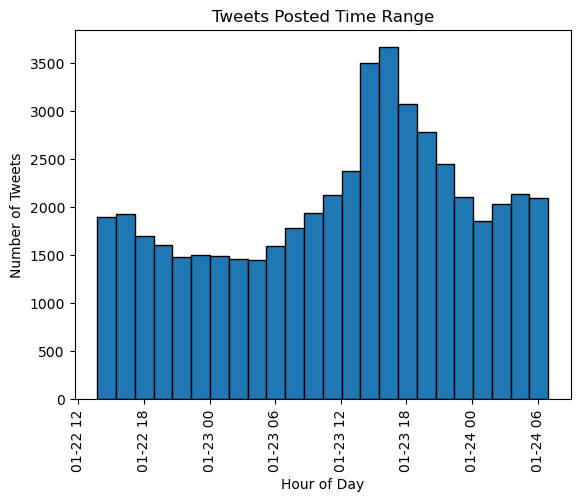

In [6]:
df['Datetime'] = pd.to_datetime(df['Datetime'])

plt.hist(df['Datetime'], bins=24, edgecolor='black')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Tweets')
plt.title('Tweets Posted Time Range')
plt.xticks(rotation=90)

plt.show()

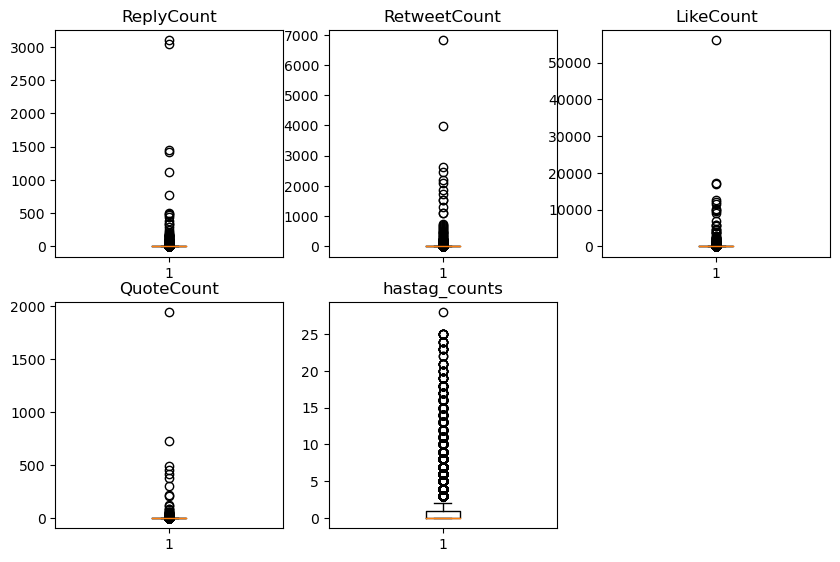

In [7]:
# Boxplots
fig = plt.figure(figsize = (10, 10))
features = ['ReplyCount',
            'RetweetCount',
            'LikeCount',
            'QuoteCount',
            'hastag_counts']
for i in range(len(features)):
    plt.subplot(3,3, i+1)
    plt.boxplot(df[features[i]])
    plt.title(features[i])

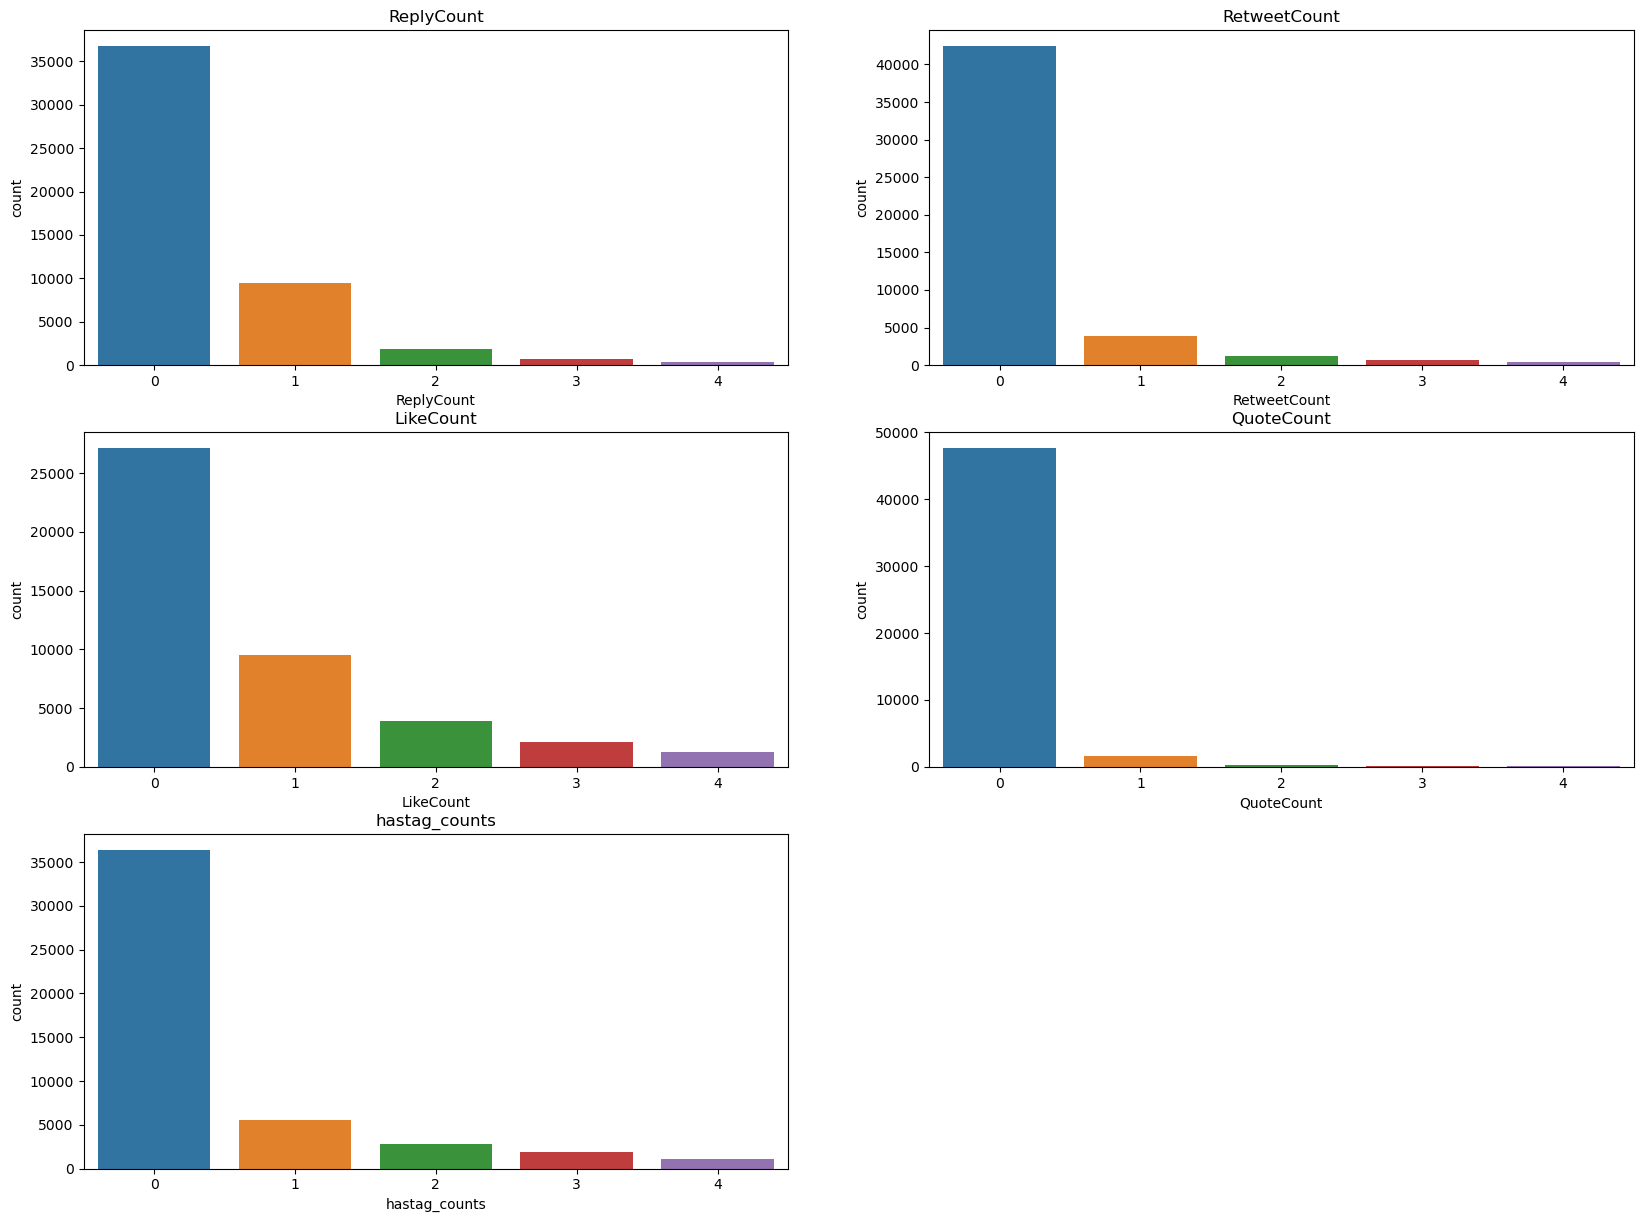

In [8]:
#CountPlot or Barcharts
fig = plt.figure(figsize = (20, 20))
for i in range(len(features)):
    plt.subplot(4,2, i+1)
    sns.countplot(data=df, x=features[i], order=df[features[i]].value_counts().index[:5])
    plt.title(features[i])

In [9]:

for i in range(len(df['MentionedUsers'])):
    if isinstance(df['MentionedUsers'][i], str):
        username = df['MentionedUsers'][i].split("username='")[1].split("',")[0]
        df.loc[i, 'MentionedUsers'] = username
    else:
        df.loc[i, 'MentionedUsers'] = np.nan

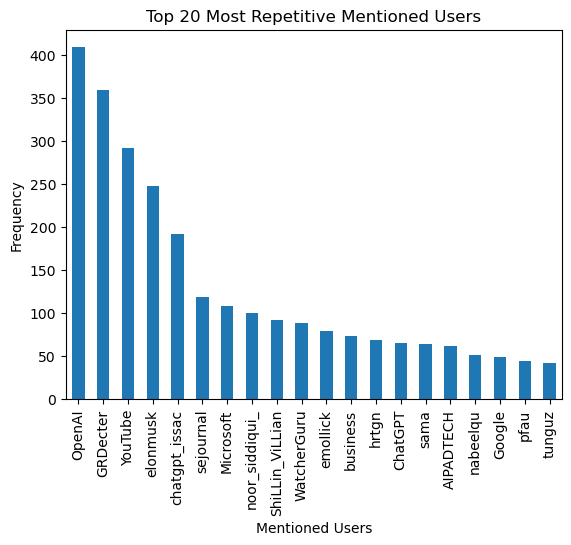

In [10]:
counts = df['MentionedUsers'].value_counts()
top = counts.nlargest(20)

top.plot(kind='bar')

plt.title('Top 20 Most Repetitive Mentioned Users')
plt.xlabel('Mentioned Users')
plt.ylabel('Frequency')

plt.show()

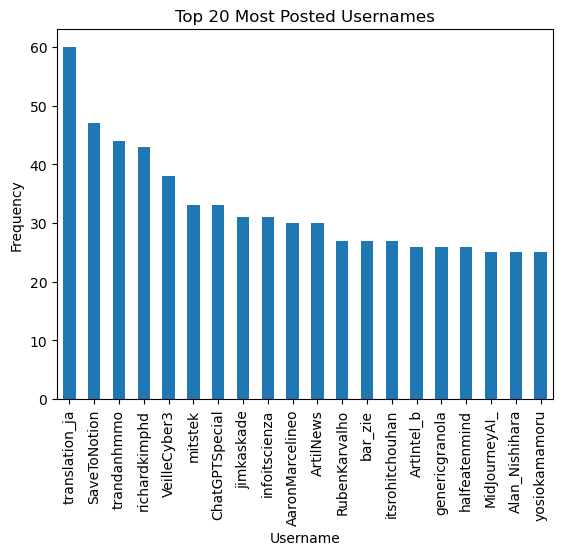

In [11]:
counts = df['Username'].value_counts()
top = counts.nlargest(20)

top.plot(kind='bar')

plt.title('Top 20 Most Posted Usernames')
plt.xlabel('Username')
plt.ylabel('Frequency')

plt.show()

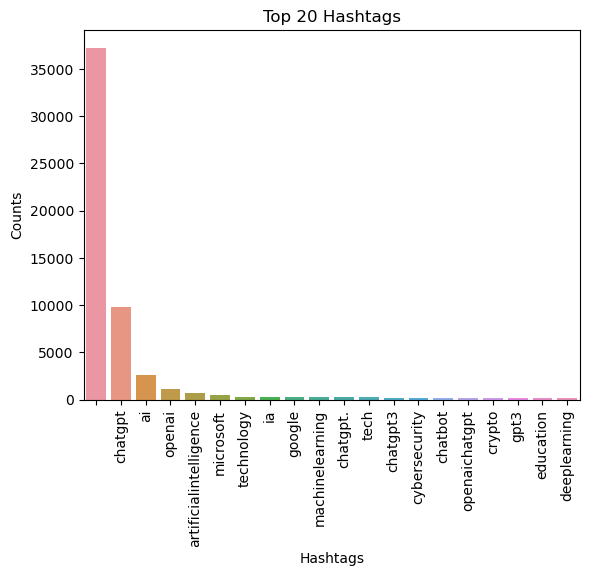

In [12]:
df['hashtags'] = df['hashtag'].apply(lambda x: re.sub(r'[\[\]#\'"]', '', x.lower()))
hashtags = df['hashtags'].str.split(',', expand=True).stack().str.strip().value_counts()

top_hashtags = hashtags.head(20)

sns.barplot(x=top_hashtags.index, y=top_hashtags.values)
plt.title('Top 20 Hashtags')
plt.xlabel('Hashtags')
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.show()

**We generate a variable consist of aggregation of ReplyCount, RetweetCount,LikeCount, QuoteCount to better understand the reactions to the hashtags or other texts.**

Text(0.5, 1.0, 'Reaction Counts')

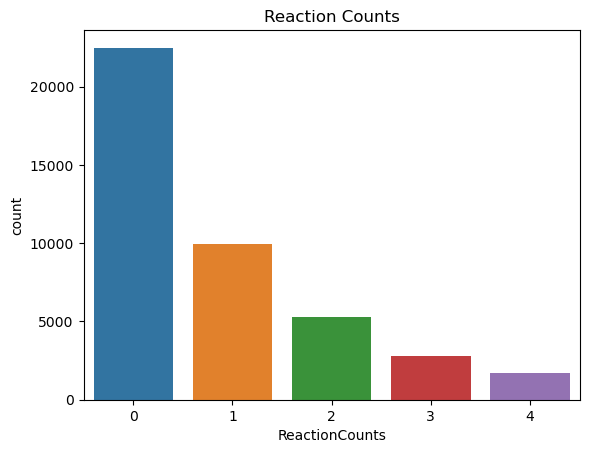

In [13]:
# Feature Engineering
df['ReactionCounts'] = df['ReplyCount'] + df['RetweetCount'] + df['LikeCount'] + df['QuoteCount']
sns.countplot(data=df, x='ReactionCounts', order=df['ReactionCounts'].value_counts().index[:5])
plt.title('Reaction Counts')

**Here we should mention out of 50K of total posts, almost half of them did not even received any reactions from (ReplyCount, RetweetCount,LikeCount, QuoteCount) from other users.**

In [14]:
df_sorted = df.sort_values('ReactionCounts', ascending=False)
df_sorted[['Text', 'Username', 'ReplyCount', 'RetweetCount', 'LikeCount', 'QuoteCount', 'ReactionCounts']].head(5)

,Text,Username,ReplyCount,RetweetCount,LikeCount,QuoteCount,ReactionCounts
399,ChatGPT passed a Wharton MBA exam. \n\nTime to...,GRDecter,1421,6815,56073,1947,66256
15356,子どもの練習用に基礎単語1000単語くらい網羅した瞬間英作文教材ほしいけど自作するの大変そう...,sashishi_EN,14,3987,17150,216,21367
11134,The fact that ChatGPT writes strange and medio...,mccormick_ted,68,1874,16856,81,18879
2855,Pretty absurd that chatGPT has passed the Unit...,noor_siddiqui_,496,2627,12557,726,16406
44851,ChatGPT has passed:\n\n- United States medical...,GRDecter,777,2082,12158,456,15473


**We could see the most reactions taken to these posts**

In [15]:
pd.set_option('display.max_colwidth', None)
df_sorted['Text'].head()

399                                                                                                                                                                                                                             ChatGPT passed a Wharton MBA exam. \n\nTime to overhaul education.
15356                                                                                                                                                          子どもの練習用に基礎単語1000単語くらい網羅した瞬間英作文教材ほしいけど自作するの大変そうだなーどうしようかなーって考えてたけど、ChatGPTさんが一瞬で作ってくれることに気付いた。ほんと凄いねこのAI...。 https://t.co/ZEaf3WH5eQ
11134                                                                           The fact that ChatGPT writes strange and mediocre undergraduate humanities papers but fantastic elite MBA exams suggests it may not have the same implications for every kind of education https://t.co/6MiaepzCDU
2855     Pretty absurd that chatGPT has passed the United States Medical Licensing Examination (USMLE). \n\nToday, it takes 4 y

**By reviewing the top reacted tweets, we could see most of them are about passing exams or MBA exam by the ChatGPT and that makes other users reacted. This could be further improve by taking a larger dataset with more time interval between the post to avoid the noise of news**

Text(0.5, 1.0, 'Languages in the Posts')

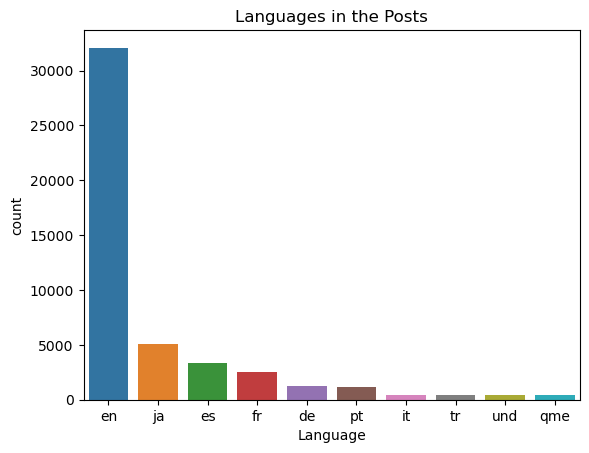

In [16]:
sns.countplot(data=df, x='Language', order=df['Language'].value_counts().index[:10])
plt.title('Languages in the Posts')

# Text Analytics/ Pre-Processing

In [17]:
# We took all the posts in English.
df = df[df['Language'] == 'en']

cols_to_keep = ['Text', 'hashtags', 'ReactionCounts']
df = df.drop(columns=[col for col in df.columns if col not in cols_to_keep])

df = df.reset_index(drop=True)
print(df.shape)
df.head()

(32076, 3)


,Text,hashtags,ReactionCounts
0,@AlexandrovnaIng Prohibition of ChatGPT has been added to the honor code of my daughter’s school,,6
1,Bow down to chatGPT 🫡..... https://t.co/ENTSzi2AQ9,,2
2,ChatGPT runs 10K Nvidia training GPUs with potential for thousands more https://t.co/Uhq62t0Uw4,,0
3,"@SWENGDAD There is repetitive work in every job, there are lots of small tasks that can leverage chatgpt or copilot and keep you working at a higher level of abstraction.",,4
4,I created a fictional jewelry brand using ChatGPT and Midjourney.\n\nhttps://t.co/gtWdNZ0laM\n\n#ChatGPT #midjourney https://t.co/N5hlelZpTY,"chatgpt, midjourney",4


*** This should be deleted: We should do information cascades to find most used word among the most reacted posts. after removing the stopwords and preliminary text analysis ***

### Sentence Tokenizing

In [18]:
nltk.download('punkt')

sent_tokenized = []

for text in df['Text'].values:
    tokens = nltk.sent_tokenize(text)
    sent_tokenized.append(tokens)

df['Sentence Tokenized'] = sent_tokenized
df.head()

[nltk_data] Downloading package punkt to /Users/student/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Text,hashtags,ReactionCounts,Sentence Tokenized
0,@AlexandrovnaIng Prohibition of ChatGPT has been added to the honor code of my daughter’s school,,6,[@AlexandrovnaIng Prohibition of ChatGPT has been added to the honor code of my daughter’s school]
1,Bow down to chatGPT 🫡..... https://t.co/ENTSzi2AQ9,,2,[Bow down to chatGPT 🫡..... https://t.co/ENTSzi2AQ9]
2,ChatGPT runs 10K Nvidia training GPUs with potential for thousands more https://t.co/Uhq62t0Uw4,,0,[ChatGPT runs 10K Nvidia training GPUs with potential for thousands more https://t.co/Uhq62t0Uw4]
3,"@SWENGDAD There is repetitive work in every job, there are lots of small tasks that can leverage chatgpt or copilot and keep you working at a higher level of abstraction.",,4,"[@SWENGDAD There is repetitive work in every job, there are lots of small tasks that can leverage chatgpt or copilot and keep you working at a higher level of abstraction.]"
4,I created a fictional jewelry brand using ChatGPT and Midjourney.\n\nhttps://t.co/gtWdNZ0laM\n\n#ChatGPT #midjourney https://t.co/N5hlelZpTY,"chatgpt, midjourney",4,"[I created a fictional jewelry brand using ChatGPT and Midjourney., https://t.co/gtWdNZ0laM\n\n#ChatGPT #midjourney https://t.co/N5hlelZpTY]"


### Word Tokenizing

In [19]:
# For topic modeling we start form the body of tweets to perform word tokenizing.
all_docs = df['Text'].values

exclude = set(string.punctuation)
tokenized = []
tokenizer = TweetTokenizer()
for doc in all_docs:
    tokens = tokenizer.tokenize(doc.lower())
    tokenized.append(''.join([ch for ch in ' '.join(tokens) if ch not in exclude]).split())

df['Word Tokenized'] = tokenized
df.head()

,Text,hashtags,ReactionCounts,Sentence Tokenized,Word Tokenized
0,@AlexandrovnaIng Prohibition of ChatGPT has been added to the honor code of my daughter’s school,,6,[@AlexandrovnaIng Prohibition of ChatGPT has been added to the honor code of my daughter’s school],"[alexandrovnaing, prohibition, of, chatgpt, has, been, added, to, the, honor, code, of, my, daughter, ’, s, school]"
1,Bow down to chatGPT 🫡..... https://t.co/ENTSzi2AQ9,,2,[Bow down to chatGPT 🫡..... https://t.co/ENTSzi2AQ9],"[bow, down, to, chatgpt, 🫡, httpstcoentszi2aq9]"
2,ChatGPT runs 10K Nvidia training GPUs with potential for thousands more https://t.co/Uhq62t0Uw4,,0,[ChatGPT runs 10K Nvidia training GPUs with potential for thousands more https://t.co/Uhq62t0Uw4],"[chatgpt, runs, 10k, nvidia, training, gpus, with, potential, for, thousands, more, httpstcouhq62t0uw4]"
3,"@SWENGDAD There is repetitive work in every job, there are lots of small tasks that can leverage chatgpt or copilot and keep you working at a higher level of abstraction.",,4,"[@SWENGDAD There is repetitive work in every job, there are lots of small tasks that can leverage chatgpt or copilot and keep you working at a higher level of abstraction.]","[swengdad, there, is, repetitive, work, in, every, job, there, are, lots, of, small, tasks, that, can, leverage, chatgpt, or, copilot, and, keep, you, working, at, a, higher, level, of, abstraction]"
4,I created a fictional jewelry brand using ChatGPT and Midjourney.\n\nhttps://t.co/gtWdNZ0laM\n\n#ChatGPT #midjourney https://t.co/N5hlelZpTY,"chatgpt, midjourney",4,"[I created a fictional jewelry brand using ChatGPT and Midjourney., https://t.co/gtWdNZ0laM\n\n#ChatGPT #midjourney https://t.co/N5hlelZpTY]","[i, created, a, fictional, jewelry, brand, using, chatgpt, and, midjourney, httpstcogtwdnz0lam, chatgpt, midjourney, httpstcon5hlelzpty]"


### Removing Punctuations

In [20]:
def remove_punctuation(tokens):
    punctuations = string.punctuation
    tokens = [token.translate(str.maketrans('', '', punctuations)) for token in tokens]
    tokens = [token for token in tokens if len(token) > 1]
    return tokens

df['Punctuation Removed'] = df['Word Tokenized'].apply(remove_punctuation)
df.head()

,Text,hashtags,ReactionCounts,Sentence Tokenized,Word Tokenized,Punctuation Removed
0,@AlexandrovnaIng Prohibition of ChatGPT has been added to the honor code of my daughter’s school,,6,[@AlexandrovnaIng Prohibition of ChatGPT has been added to the honor code of my daughter’s school],"[alexandrovnaing, prohibition, of, chatgpt, has, been, added, to, the, honor, code, of, my, daughter, ’, s, school]","[alexandrovnaing, prohibition, of, chatgpt, has, been, added, to, the, honor, code, of, my, daughter, school]"
1,Bow down to chatGPT 🫡..... https://t.co/ENTSzi2AQ9,,2,[Bow down to chatGPT 🫡..... https://t.co/ENTSzi2AQ9],"[bow, down, to, chatgpt, 🫡, httpstcoentszi2aq9]","[bow, down, to, chatgpt, httpstcoentszi2aq9]"
2,ChatGPT runs 10K Nvidia training GPUs with potential for thousands more https://t.co/Uhq62t0Uw4,,0,[ChatGPT runs 10K Nvidia training GPUs with potential for thousands more https://t.co/Uhq62t0Uw4],"[chatgpt, runs, 10k, nvidia, training, gpus, with, potential, for, thousands, more, httpstcouhq62t0uw4]","[chatgpt, runs, 10k, nvidia, training, gpus, with, potential, for, thousands, more, httpstcouhq62t0uw4]"
3,"@SWENGDAD There is repetitive work in every job, there are lots of small tasks that can leverage chatgpt or copilot and keep you working at a higher level of abstraction.",,4,"[@SWENGDAD There is repetitive work in every job, there are lots of small tasks that can leverage chatgpt or copilot and keep you working at a higher level of abstraction.]","[swengdad, there, is, repetitive, work, in, every, job, there, are, lots, of, small, tasks, that, can, leverage, chatgpt, or, copilot, and, keep, you, working, at, a, higher, level, of, abstraction]","[swengdad, there, is, repetitive, work, in, every, job, there, are, lots, of, small, tasks, that, can, leverage, chatgpt, or, copilot, and, keep, you, working, at, higher, level, of, abstraction]"
4,I created a fictional jewelry brand using ChatGPT and Midjourney.\n\nhttps://t.co/gtWdNZ0laM\n\n#ChatGPT #midjourney https://t.co/N5hlelZpTY,"chatgpt, midjourney",4,"[I created a fictional jewelry brand using ChatGPT and Midjourney., https://t.co/gtWdNZ0laM\n\n#ChatGPT #midjourney https://t.co/N5hlelZpTY]","[i, created, a, fictional, jewelry, brand, using, chatgpt, and, midjourney, httpstcogtwdnz0lam, chatgpt, midjourney, httpstcon5hlelzpty]","[created, fictional, jewelry, brand, using, chatgpt, and, midjourney, httpstcogtwdnz0lam, chatgpt, midjourney, httpstcon5hlelzpty]"


### Removing StopWords and Other Unnecessaries

In [21]:
sw = set(stopwords.words('english'))
sw.add('rt')
sw.add('...')

sw_removed = []
for j, sent in enumerate(df['Word Tokenized']):
    sw_removed.append([i for i in sent
                      if i not in sw
                      and len(i)>2
                      and (not i.startswith("http"))])

df['Stopword Removed'] = sw_removed
df.head()

,Text,hashtags,ReactionCounts,Sentence Tokenized,Word Tokenized,Punctuation Removed,Stopword Removed
0,@AlexandrovnaIng Prohibition of ChatGPT has been added to the honor code of my daughter’s school,,6,[@AlexandrovnaIng Prohibition of ChatGPT has been added to the honor code of my daughter’s school],"[alexandrovnaing, prohibition, of, chatgpt, has, been, added, to, the, honor, code, of, my, daughter, ’, s, school]","[alexandrovnaing, prohibition, of, chatgpt, has, been, added, to, the, honor, code, of, my, daughter, school]","[alexandrovnaing, prohibition, chatgpt, added, honor, code, daughter, school]"
1,Bow down to chatGPT 🫡..... https://t.co/ENTSzi2AQ9,,2,[Bow down to chatGPT 🫡..... https://t.co/ENTSzi2AQ9],"[bow, down, to, chatgpt, 🫡, httpstcoentszi2aq9]","[bow, down, to, chatgpt, httpstcoentszi2aq9]","[bow, chatgpt]"
2,ChatGPT runs 10K Nvidia training GPUs with potential for thousands more https://t.co/Uhq62t0Uw4,,0,[ChatGPT runs 10K Nvidia training GPUs with potential for thousands more https://t.co/Uhq62t0Uw4],"[chatgpt, runs, 10k, nvidia, training, gpus, with, potential, for, thousands, more, httpstcouhq62t0uw4]","[chatgpt, runs, 10k, nvidia, training, gpus, with, potential, for, thousands, more, httpstcouhq62t0uw4]","[chatgpt, runs, 10k, nvidia, training, gpus, potential, thousands]"
3,"@SWENGDAD There is repetitive work in every job, there are lots of small tasks that can leverage chatgpt or copilot and keep you working at a higher level of abstraction.",,4,"[@SWENGDAD There is repetitive work in every job, there are lots of small tasks that can leverage chatgpt or copilot and keep you working at a higher level of abstraction.]","[swengdad, there, is, repetitive, work, in, every, job, there, are, lots, of, small, tasks, that, can, leverage, chatgpt, or, copilot, and, keep, you, working, at, a, higher, level, of, abstraction]","[swengdad, there, is, repetitive, work, in, every, job, there, are, lots, of, small, tasks, that, can, leverage, chatgpt, or, copilot, and, keep, you, working, at, higher, level, of, abstraction]","[swengdad, repetitive, work, every, job, lots, small, tasks, leverage, chatgpt, copilot, keep, working, higher, level, abstraction]"
4,I created a fictional jewelry brand using ChatGPT and Midjourney.\n\nhttps://t.co/gtWdNZ0laM\n\n#ChatGPT #midjourney https://t.co/N5hlelZpTY,"chatgpt, midjourney",4,"[I created a fictional jewelry brand using ChatGPT and Midjourney., https://t.co/gtWdNZ0laM\n\n#ChatGPT #midjourney https://t.co/N5hlelZpTY]","[i, created, a, fictional, jewelry, brand, using, chatgpt, and, midjourney, httpstcogtwdnz0lam, chatgpt, midjourney, httpstcon5hlelzpty]","[created, fictional, jewelry, brand, using, chatgpt, and, midjourney, httpstcogtwdnz0lam, chatgpt, midjourney, httpstcon5hlelzpty]","[created, fictional, jewelry, brand, using, chatgpt, midjourney, chatgpt, midjourney]"


### Part of Speech Tagging

In [22]:
pos_tags_list = []
for tokens in df['Word Tokenized']:
    pos_tags = nltk.pos_tag(tokens)
    pos_tags_list.append(pos_tags)
df['pos_tags'] = pos_tags_list
df.head()

,Text,hashtags,ReactionCounts,Sentence Tokenized,Word Tokenized,Punctuation Removed,Stopword Removed,pos_tags
0,@AlexandrovnaIng Prohibition of ChatGPT has been added to the honor code of my daughter’s school,,6,[@AlexandrovnaIng Prohibition of ChatGPT has been added to the honor code of my daughter’s school],"[alexandrovnaing, prohibition, of, chatgpt, has, been, added, to, the, honor, code, of, my, daughter, ’, s, school]","[alexandrovnaing, prohibition, of, chatgpt, has, been, added, to, the, honor, code, of, my, daughter, school]","[alexandrovnaing, prohibition, chatgpt, added, honor, code, daughter, school]","[(alexandrovnaing, VBG), (prohibition, NN), (of, IN), (chatgpt, NN), (has, VBZ), (been, VBN), (added, VBN), (to, TO), (the, DT), (honor, JJ), (code, NN), (of, IN), (my, PRP$), (daughter, NN), (’, NNP), (s, VBZ), (school, NN)]"
1,Bow down to chatGPT 🫡..... https://t.co/ENTSzi2AQ9,,2,[Bow down to chatGPT 🫡..... https://t.co/ENTSzi2AQ9],"[bow, down, to, chatgpt, 🫡, httpstcoentszi2aq9]","[bow, down, to, chatgpt, httpstcoentszi2aq9]","[bow, chatgpt]","[(bow, RB), (down, RB), (to, TO), (chatgpt, VB), (🫡, NNP), (httpstcoentszi2aq9, NN)]"
2,ChatGPT runs 10K Nvidia training GPUs with potential for thousands more https://t.co/Uhq62t0Uw4,,0,[ChatGPT runs 10K Nvidia training GPUs with potential for thousands more https://t.co/Uhq62t0Uw4],"[chatgpt, runs, 10k, nvidia, training, gpus, with, potential, for, thousands, more, httpstcouhq62t0uw4]","[chatgpt, runs, 10k, nvidia, training, gpus, with, potential, for, thousands, more, httpstcouhq62t0uw4]","[chatgpt, runs, 10k, nvidia, training, gpus, potential, thousands]","[(chatgpt, NN), (runs, VBZ), (10k, CD), (nvidia, JJ), (training, NN), (gpus, NN), (with, IN), (potential, JJ), (for, IN), (thousands, NNS), (more, RBR), (httpstcouhq62t0uw4, NNS)]"
3,"@SWENGDAD There is repetitive work in every job, there are lots of small tasks that can leverage chatgpt or copilot and keep you working at a higher level of abstraction.",,4,"[@SWENGDAD There is repetitive work in every job, there are lots of small tasks that can leverage chatgpt or copilot and keep you working at a higher level of abstraction.]","[swengdad, there, is, repetitive, work, in, every, job, there, are, lots, of, small, tasks, that, can, leverage, chatgpt, or, copilot, and, keep, you, working, at, a, higher, level, of, abstraction]","[swengdad, there, is, repetitive, work, in, every, job, there, are, lots, of, small, tasks, that, can, leverage, chatgpt, or, copilot, and, keep, you, working, at, higher, level, of, abstraction]","[swengdad, repetitive, work, every, job, lots, small, tasks, leverage, chatgpt, copilot, keep, working, higher, level, abstraction]","[(swengdad, NN), (there, EX), (is, VBZ), (repetitive, JJ), (work, NN), (in, IN), (every, DT), (job, NN), (there, EX), (are, VBP), (lots, NNS), (of, IN), (small, JJ), (tasks, NNS), (that, WDT), (can, MD), (leverage, VB), (chatgpt, NN), (or, CC), (copilot, NN), (and, CC), (keep, VB), (you, PRP), (working, VBG), (at, IN), (a, DT), (higher, JJR), (level, NN), (of, IN), (abstraction, NN)]"
4,I created a fictional jewelry brand using ChatGPT and Midjourney.\n\nhttps://t.co/gtWdNZ0laM\n\n#ChatGPT #midjourney https://t.co/N5hlelZpTY,"chatgpt, midjourney",4,"[I created a fictional jewelry brand using ChatGPT and Midjourney., https://t.co/gtWdNZ0laM\n\n#ChatGPT #midjourney https://t.co/N5hlelZpTY]","[i, created, a, fictional, jewelry, brand, using, chatgpt, and, midjourney, httpstcogtwdnz0lam, chatgpt, midjourney, httpstcon5hlelzpty]","[created, fictional, jewelry, brand, using, chatgpt, and, midjourney, httpstcogtwdnz0lam, chatgpt, midjourney, httpstcon5hlelzpty]","[created, fictional, jewelry, brand, using, chatgpt, midjourney, chatgpt, midjourney]","[(i, RB), (created, VBD), (a, DT), (fictional, JJ), (jewelry, NN), (brand, NN), (using, VBG), (chatgpt, NN), (and, CC), (midjourney, NN), (httpstcogtwdnz0lam, NN), (chatgpt, NN), (midjourney, NN), (httpstcon5hlelzpty, NN)]"


### Word Stemming

In [23]:
stemmer = PorterStemmer()
def stemming(words):
    return [stemmer.stem(word) for word in words]

df['Word Stemmed'] = df['Stopword Removed'].apply(stemming)
df.head()

,Text,hashtags,ReactionCounts,Sentence Tokenized,Word Tokenized,Punctuation Removed,Stopword Removed,pos_tags,Word Stemmed
0,@AlexandrovnaIng Prohibition of ChatGPT has been added to the honor code of my daughter’s school,,6,[@AlexandrovnaIng Prohibition of ChatGPT has been added to the honor code of my daughter’s school],"[alexandrovnaing, prohibition, of, chatgpt, has, been, added, to, the, honor, code, of, my, daughter, ’, s, school]","[alexandrovnaing, prohibition, of, chatgpt, has, been, added, to, the, honor, code, of, my, daughter, school]","[alexandrovnaing, prohibition, chatgpt, added, honor, code, daughter, school]","[(alexandrovnaing, VBG), (prohibition, NN), (of, IN), (chatgpt, NN), (has, VBZ), (been, VBN), (added, VBN), (to, TO), (the, DT), (honor, JJ), (code, NN), (of, IN), (my, PRP$), (daughter, NN), (’, NNP), (s, VBZ), (school, NN)]","[alexandrovna, prohibit, chatgpt, ad, honor, code, daughter, school]"
1,Bow down to chatGPT 🫡..... https://t.co/ENTSzi2AQ9,,2,[Bow down to chatGPT 🫡..... https://t.co/ENTSzi2AQ9],"[bow, down, to, chatgpt, 🫡, httpstcoentszi2aq9]","[bow, down, to, chatgpt, httpstcoentszi2aq9]","[bow, chatgpt]","[(bow, RB), (down, RB), (to, TO), (chatgpt, VB), (🫡, NNP), (httpstcoentszi2aq9, NN)]","[bow, chatgpt]"
2,ChatGPT runs 10K Nvidia training GPUs with potential for thousands more https://t.co/Uhq62t0Uw4,,0,[ChatGPT runs 10K Nvidia training GPUs with potential for thousands more https://t.co/Uhq62t0Uw4],"[chatgpt, runs, 10k, nvidia, training, gpus, with, potential, for, thousands, more, httpstcouhq62t0uw4]","[chatgpt, runs, 10k, nvidia, training, gpus, with, potential, for, thousands, more, httpstcouhq62t0uw4]","[chatgpt, runs, 10k, nvidia, training, gpus, potential, thousands]","[(chatgpt, NN), (runs, VBZ), (10k, CD), (nvidia, JJ), (training, NN), (gpus, NN), (with, IN), (potential, JJ), (for, IN), (thousands, NNS), (more, RBR), (httpstcouhq62t0uw4, NNS)]","[chatgpt, run, 10k, nvidia, train, gpu, potenti, thousand]"
3,"@SWENGDAD There is repetitive work in every job, there are lots of small tasks that can leverage chatgpt or copilot and keep you working at a higher level of abstraction.",,4,"[@SWENGDAD There is repetitive work in every job, there are lots of small tasks that can leverage chatgpt or copilot and keep you working at a higher level of abstraction.]","[swengdad, there, is, repetitive, work, in, every, job, there, are, lots, of, small, tasks, that, can, leverage, chatgpt, or, copilot, and, keep, you, working, at, a, higher, level, of, abstraction]","[swengdad, there, is, repetitive, work, in, every, job, there, are, lots, of, small, tasks, that, can, leverage, chatgpt, or, copilot, and, keep, you, working, at, higher, level, of, abstraction]","[swengdad, repetitive, work, every, job, lots, small, tasks, leverage, chatgpt, copilot, keep, working, higher, level, abstraction]","[(swengdad, NN), (there, EX), (is, VBZ), (repetitive, JJ), (work, NN), (in, IN), (every, DT), (job, NN), (there, EX), (are, VBP), (lots, NNS), (of, IN), (small, JJ), (tasks, NNS), (that, WDT), (can, MD), (leverage, VB), (chatgpt, NN), (or, CC), (copilot, NN), (and, CC), (keep, VB), (you, PRP), (working, VBG), (at, IN), (a, DT), (higher, JJR), (level, NN), (of, IN), (abstraction, NN)]","[swengdad, repetit, work, everi, job, lot, small, task, leverag, chatgpt, copilot, keep, work, higher, level, abstract]"
4,I created a fictional jewelry brand using ChatGPT and Midjourney.\n\nhttps://t.co/gtWdNZ0laM\n\n#ChatGPT #midjourney https://t.co/N5hlelZpTY,"chatgpt, midjourney",4,"[I created a fictional jewelry brand using ChatGPT and Midjourney., https://t.co/gtWdNZ0laM\n\n#ChatGPT #midjourney https://t.co/N5hlelZpTY]","[i, created, a, fictional, jewelry, brand, using, chatgpt, and, midjourney, httpstcogtwdnz0lam, chatgpt, midjourney, httpstcon5hlelzpty]","[created, fictional, jewelry, brand, using, chatgpt, and, midjourney, httpstcogtwdnz0lam, chatgpt, midjourney, httpstcon5hlelzpty]","[created, fictional, jewelry, brand, 

### Lemmatization

In [27]:


import spacy
spacy.load("en_core_web_sm")

In [28]:
def lemmatization(texts, allowed_postags=["NOUN", "ADJ", "ADV"]):
    nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
    texts_out = []
    for text in texts:
        doc = nlp(text)
        new_text = []
        for token in doc:
            if not token.is_punct and not token.is_space and token.is_alpha:
                if token.pos_ in allowed_postags:
                    new_text.append(token.lemma_)
        final = " ".join(new_text)
        texts_out.append(final)
    return texts_out

df['Lemmatized Text'] = lemmatization(df['Text'])

df.head()

,Text,hashtags,ReactionCounts,Sentence Tokenized,Word Tokenized,Punctuation Removed,Stopword Removed,pos_tags,Word Stemmed,Lemmatized Text
0,@AlexandrovnaIng Prohibition of ChatGPT has been added to the honor code of my daughter’s school,,6,[@AlexandrovnaIng Prohibition of ChatGPT has been added to the honor code of my daughter’s school],"[alexandrovnaing, prohibition, of, chatgpt, has, been, added, to, the, honor, code, of, my, daughter, ’, s, school]","[alexandrovnaing, prohibition, of, chatgpt, has, been, added, to, the, honor, code, of, my, daughter, school]","[alexandrovnaing, prohibition, chatgpt, added, honor, code, daughter, school]","[(alexandrovnaing, VBG), (prohibition, NN), (of, IN), (chatgpt, NN), (has, VBZ), (been, VBN), (added, VBN), (to, TO), (the, DT), (honor, JJ), (code, NN), (of, IN), (my, PRP$), (daughter, NN), (’, NNP), (s, VBZ), (school, NN)]","[alexandrovna, prohibit, chatgpt, ad, honor, code, daughter, school]",prohibition honor code daughter school
1,Bow down to chatGPT 🫡..... https://t.co/ENTSzi2AQ9,,2,[Bow down to chatGPT 🫡..... https://t.co/ENTSzi2AQ9],"[bow, down, to, chatgpt, 🫡, httpstcoentszi2aq9]","[bow, down, to, chatgpt, httpstcoentszi2aq9]","[bow, chatgpt]","[(bow, RB), (down, RB), (to, TO), (chatgpt, VB), (🫡, NNP), (httpstcoentszi2aq9, NN)]","[bow, chatgpt]",bow
2,ChatGPT runs 10K Nvidia training GPUs with potential for thousands more https://t.co/Uhq62t0Uw4,,0,[ChatGPT runs 10K Nvidia training GPUs with potential for thousands more https://t.co/Uhq62t0Uw4],"[chatgpt, runs, 10k, nvidia, training, gpus, with, potential, for, thousands, more, httpstcouhq62t0uw4]","[chatgpt, runs, 10k, nvidia, training, gpus, with, potential, for, thousands, more, httpstcouhq62t0uw4]","[chatgpt, runs, 10k, nvidia, training, gpus, potential, thousands]","[(chatgpt, NN), (runs, VBZ), (10k, CD), (nvidia, JJ), (training, NN), (gpus, NN), (with, IN), (potential, JJ), (for, IN), (thousands, NNS), (more, RBR), (httpstcouhq62t0uw4, NNS)]","[chatgpt, run, 10k, nvidia, train, gpu, potenti, thousand]",chatgpt training gpu potential thousand more
3,"@SWENGDAD There is repetitive work in every job, there are lots of small tasks that can leverage chatgpt or copilot and keep you working at a higher level of abstraction.",,4,"[@SWENGDAD There is repetitive work in every job, there are lots of small tasks that can leverage chatgpt or copilot and keep you working at a higher level of abstraction.]","[swengdad, there, is, repetitive, work, in, every, job, there, are, lots, of, small, tasks, that, can, leverage, chatgpt, or, copilot, and, keep, you, working, at, a, higher, level, of, abstraction]","[swengdad, there, is, repetitive, work, in, every, job, there, are, lots, of, small, tasks, that, can, leverage, chatgpt, or, copilot, and, keep, you, working, at, higher, level, of, abstraction]","[swengdad, repetitive, work, every, job, lots, small, tasks, leverage, chatgpt, copilot, keep, working, higher, level, abstraction]","[(swengdad, NN), (there, EX), (is, VBZ), (repetitive, JJ), (work, NN), (in, IN), (every, DT), (job, NN), (there, EX), (are, VBP), (lots, NNS), (of, IN), (small, JJ), (tasks, NNS), (that, WDT), (can, MD), (leverage, VB), (chatgpt, NN), (or, CC), (copilot, NN), (and, CC), (keep, VB), (you, PRP), (working, VBG), (at, IN), (a, DT), (higher, JJR), (level, NN), (of, IN), (abstraction, NN)]","[swengdad, repetit, work, everi, job, lot, small, task, leverag, chatgpt, copilot, keep, work, higher, level, abstract]",repetitive work job lot small task chatgpt copilot high level abstraction
4,I created a fictional jewelry brand using ChatGPT and Midjourney.\n\nhttps://t.co/gtWdNZ0laM\n\n#ChatGPT #midjourney https://t.co/N5hlelZpTY,"chatgpt, midjourney",4,"[I created a fictional jewelry brand using ChatGPT and Midjourney., https://t.co/gtWdNZ0laM\n\n#ChatGPT #midjourney https://t.co/N5hlelZpTY]","[i, created, a, fictional, jewelry, brand, using, chatgpt, and, midjourney, httpstcogtwdnz0lam, chatgpt, midjourney, httpstcon5hlel

### Word Tokenizing The Lemmatized Column

In [29]:
nlp = spacy.load("en_core_web_sm")

def lemmatize_and_tokenize(text):
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if token.pos_ in ["NOUN", "ADJ", "ADV"]]
    return tokens

df['Tokenized Lem'] = df['Lemmatized Text'].apply(lemmatize_and_tokenize)
df.head()

,Text,hashtags,ReactionCounts,Sentence Tokenized,Word Tokenized,Punctuation Removed,Stopword Removed,pos_tags,Word Stemmed,Lemmatized Text,Tokenized Lem
0,@AlexandrovnaIng Prohibition of ChatGPT has been added to the honor code of my daughter’s school,,6,[@AlexandrovnaIng Prohibition of ChatGPT has been added to the honor code of my daughter’s school],"[alexandrovnaing, prohibition, of, chatgpt, has, been, added, to, the, honor, code, of, my, daughter, ’, s, school]","[alexandrovnaing, prohibition, of, chatgpt, has, been, added, to, the, honor, code, of, my, daughter, school]","[alexandrovnaing, prohibition, chatgpt, added, honor, code, daughter, school]","[(alexandrovnaing, VBG), (prohibition, NN), (of, IN), (chatgpt, NN), (has, VBZ), (been, VBN), (added, VBN), (to, TO), (the, DT), (honor, JJ), (code, NN), (of, IN), (my, PRP$), (daughter, NN), (’, NNP), (s, VBZ), (school, NN)]","[alexandrovna, prohibit, chatgpt, ad, honor, code, daughter, school]",prohibition honor code daughter school,"[prohibition, honor, daughter, school]"
1,Bow down to chatGPT 🫡..... https://t.co/ENTSzi2AQ9,,2,[Bow down to chatGPT 🫡..... https://t.co/ENTSzi2AQ9],"[bow, down, to, chatgpt, 🫡, httpstcoentszi2aq9]","[bow, down, to, chatgpt, httpstcoentszi2aq9]","[bow, chatgpt]","[(bow, RB), (down, RB), (to, TO), (chatgpt, VB), (🫡, NNP), (httpstcoentszi2aq9, NN)]","[bow, chatgpt]",bow,[]
2,ChatGPT runs 10K Nvidia training GPUs with potential for thousands more https://t.co/Uhq62t0Uw4,,0,[ChatGPT runs 10K Nvidia training GPUs with potential for thousands more https://t.co/Uhq62t0Uw4],"[chatgpt, runs, 10k, nvidia, training, gpus, with, potential, for, thousands, more, httpstcouhq62t0uw4]","[chatgpt, runs, 10k, nvidia, training, gpus, with, potential, for, thousands, more, httpstcouhq62t0uw4]","[chatgpt, runs, 10k, nvidia, training, gpus, potential, thousands]","[(chatgpt, NN), (runs, VBZ), (10k, CD), (nvidia, JJ), (training, NN), (gpus, NN), (with, IN), (potential, JJ), (for, IN), (thousands, NNS), (more, RBR), (httpstcouhq62t0uw4, NNS)]","[chatgpt, run, 10k, nvidia, train, gpu, potenti, thousand]",chatgpt training gpu potential thousand more,"[chatgpt, training, potential, more]"
3,"@SWENGDAD There is repetitive work in every job, there are lots of small tasks that can leverage chatgpt or copilot and keep you working at a higher level of abstraction.",,4,"[@SWENGDAD There is repetitive work in every job, there are lots of small tasks that can leverage chatgpt or copilot and keep you working at a higher level of abstraction.]","[swengdad, there, is, repetitive, work, in, every, job, there, are, lots, of, small, tasks, that, can, leverage, chatgpt, or, copilot, and, keep, you, working, at, a, higher, level, of, abstraction]","[swengdad, there, is, repetitive, work, in, every, job, there, are, lots, of, small, tasks, that, can, leverage, chatgpt, or, copilot, and, keep, you, working, at, higher, level, of, abstraction]","[swengdad, repetitive, work, every, job, lots, small, tasks, leverage, chatgpt, copilot, keep, working, higher, level, abstraction]","[(swengdad, NN), (there, EX), (is, VBZ), (repetitive, JJ), (work, NN), (in, IN), (every, DT), (job, NN), (there, EX), (are, VBP), (lots, NNS), (of, IN), (small, JJ), (tasks, NNS), (that, WDT), (can, MD), (leverage, VB), (chatgpt, NN), (or, CC), (copilot, NN), (and, CC), (keep, VB), (you, PRP), (working, VBG), (at, IN), (a, DT), (higher, JJR), (level, NN), (of, IN), (abstraction, NN)]","[swengdad, repetit, work, everi, job, lot, small, task, leverag, chatgpt, copilot, keep, work, higher, level, abstract]",repetitive work job lot small task chatgpt copilot high level abstraction,"[repetitive, work, job, lot, small, task, chatgpt, copilot, high, level, abstraction]"
4,I created a fictional jewelry brand using ChatGPT and Midjourney.\n\nhttps://t.co/gtWdNZ0laM\n\n#ChatGPT #midjourney https://t.co/N5hlelZpTY,"chatgpt, midjourney",4,"[I created a fictional jewelry brand using ChatGPT and Midjourney., https://t.co/gtWdNZ0l

# N-Gram Analysis

In [111]:
def get_top_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

<Axes: >

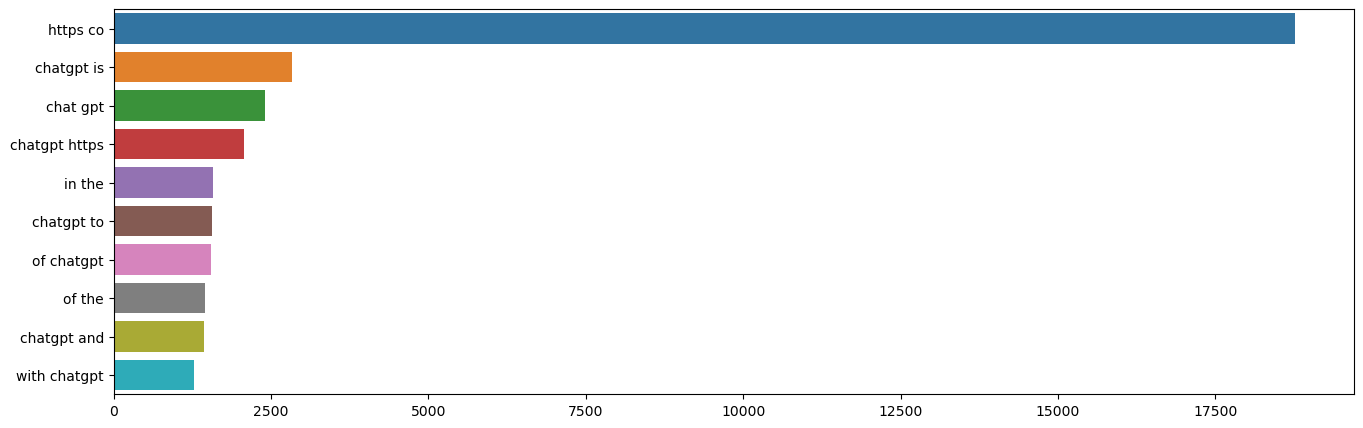

In [113]:
plt.figure(figsize=(16,5))
top_tweet_bigrams=get_top_bigrams(df["Text"])[:10]
x,y=map(list,zip(*top_tweet_bigrams))
sns.barplot(x=y,y=x)

## Sentiment Analysis
### Sentiment Analysis on Tokenized Sentences

In [59]:
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

scores = []
for sentence_list in df['Text'].apply(nltk.sent_tokenize):
    sentence_scores = []
    for sentence in sentence_list:
        sentence_score = sid.polarity_scores(sentence)
        sentence_scores.append(sentence_score)
    avg_score = {k: sum(d[k] for d in sentence_scores) / len(sentence_scores) for k in sentence_scores[0]}
    scores.append(avg_score)

sentiment_df = pd.DataFrame(scores)
df = pd.concat([df, sentiment_df], axis=1)

df.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/student/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Text,hashtags,ReactionCounts,Sentence Tokenized,Word Tokenized,Punctuation Removed,Stopword Removed,pos_tags,Word Stemmed,Lemmatized Text,Tokenized Lem,num_words,num_sw,num_ch,lenght,avg_lenght,upper_cacse,neg,neu,pos,compound
0,@AlexandrovnaIng Prohibition of ChatGPT has been added to the honor code of my daughter’s school,,6,[@AlexandrovnaIng Prohibition of ChatGPT has been added to the honor code of my daughter’s school],"[alexandrovnaing, prohibition, of, chatgpt, has, been, added, to, the, honor, code, of, my, daughter, ’, s, school]","[alexandrovnaing, prohibition, of, chatgpt, has, been, added, to, the, honor, code, of, my, daughter, school]","[alexandrovnaing, prohibition, chatgpt, added, honor, code, daughter, school]","[(alexandrovnaing, VBG), (prohibition, NN), (of, IN), (chatgpt, NN), (has, VBZ), (been, VBN), (added, VBN), (to, TO), (the, DT), (honor, JJ), (code, NN), (of, IN), (my, PRP$), (daughter, NN), (’, NNP), (s, VBZ), (school, NN)]","[alexandrovna, prohibit, chatgpt, ad, honor, code, daughter, school]",prohibition honor code daughter school,"[prohibition, honor, daughter, school]",14,7,96,5.466667,5.466667,1,0.000,0.814,0.186,0.4939
1,Bow down to chatGPT 🫡..... https://t.co/ENTSzi2AQ9,,2,[Bow down to chatGPT 🫡..... https://t.co/ENTSzi2AQ9],"[bow, down, to, chatgpt, 🫡, httpstcoentszi2aq9]","[bow, down, to, chatgpt, httpstcoentszi2aq9]","[bow, chatgpt]","[(bow, RB), (down, RB), (to, TO), (chatgpt, VB), (🫡, NNP), (httpstcoentszi2aq9, NN)]","[bow, chatgpt]",bow,[],6,2,50,7.500000,7.500000,1,0.000,1.000,0.000,0.0000
2,ChatGPT runs 10K Nvidia training GPUs with potential for thousands more https://t.co/Uhq62t0Uw4,,0,[ChatGPT runs 10K Nvidia training GPUs with potential for thousands more https://t.co/Uhq62t0Uw4],"[chatgpt, runs, 10k, nvidia, training, gpus, with, potential, for, thousands, more, httpstcouhq62t0uw4]","[chatgpt, runs, 10k, nvidia, training, gpus, with, potential, for, thousands, more, httpstcouhq62t0uw4]","[chatgpt, runs, 10k, nvidia, training, gpus, potential, thousands]","[(chatgpt, NN), (runs, VBZ), (10k, CD), (nvidia, JJ), (training, NN), (gpus, NN), (with, IN), (potential, JJ), (for, IN), (thousands, NNS), (more, RBR), (httpstcouhq62t0uw4, NNS)]","[chatgpt, run, 10k, nvidia, train, gpu, potenti, thousand]",chatgpt training gpu potential thousand more,"[chatgpt, training, potential, more]",12,3,95,7.000000,7.000000,2,0.000,1.000,0.000,0.0000
3,"@SWENGDAD There is repetitive work in every job, there are lots of small tasks that can leverage chatgpt or copilot and keep you working at a higher level of abstraction.",,4,"[@SWENGDAD There is repetitive work in every job, there are lots of small tasks that can leverage chatgpt or copilot and keep you working at a higher level of abstraction.]","[swengdad, there, is, repetitive, work, in, every, job, there, are, lots, of, small, tasks, that, can, leverage, chatgpt, or, copilot, and, keep, you, working, at, a, higher, level, of, abstraction]","[swengdad, there, is, repetitive, work, in, every, job, there, are, lots, of, small, tasks, that, can, leverage, chatgpt, or, copilot, and, keep, you, working, at, higher, level, of, abstraction]","[swengdad, repetitive, work, every, job, lots, small, tasks, leverage, chatgpt, copilot, keep, working, higher, level, abstraction]","[(swengdad, NN), (there, EX), (is, VBZ), (repetitive, JJ), (work, NN), (in, IN), (every, DT), (job, NN), (there, EX), (are, VBP), (lots, NNS), (of, IN), (small, JJ), (tasks, NNS), (that, WDT), (can, MD), (leverage, VB), (chatgpt, NN), (or, CC), (copilot, NN), (and, CC), (keep, VB), (you, PRP), (working, VBG), (at, IN), (a, DT), (higher, JJR), (level, NN), (of, IN), (abstraction, NN)]","[swengdad, repetit, work, everi, job, lot, small, task, leverag, chatgpt, copilot, keep, work, higher, level, abstract]",repetitive work job lot small task chatgpt copilot high level abstraction,"[repetitive, work, job, lot, small, task, chatgpt, copilot, high, level, abstraction]",29,14,170,4.700000,4.700

**By reviewing the texts and the scores of VADER technique, it seems that the model did not scored the sentences correctly, we we incorporating other techniques aiming better results**

### Ensemble Sentiment Analysis

In [60]:
def vader_sentiment(sentence):
    sid = SentimentIntensityAnalyzer()
    return sid.polarity_scores(sentence)['compound']

def textblob_sentiment(sentence):
    return TextBlob(sentence).sentiment.polarity

def ensemble_sentiment(sentence):
    vader_score = vader_sentiment(sentence)
    textblob_score = textblob_sentiment(sentence)
    return (vader_score + textblob_score) / 2.0

df = df[df['Sentence Tokenized'].apply(lambda x: type(x) != float)]

df['ensemble_score'] = df['Sentence Tokenized'].apply(lambda sentences: [ensemble_sentiment(sentence) for sentence in sentences])
df['ensemble_mean_score'] = df['ensemble_score'].apply(lambda scores: sum(scores) / len(scores))
df.drop(['ensemble_score'], axis =1)

df.head()

,Text,hashtags,ReactionCounts,Sentence Tokenized,Word Tokenized,Punctuation Removed,Stopword Removed,pos_tags,Word Stemmed,Lemmatized Text,Tokenized Lem,num_words,num_sw,num_ch,lenght,avg_lenght,upper_cacse,neg,neu,pos,compound,ensemble_score,ensemble_mean_score
0,@AlexandrovnaIng Prohibition of ChatGPT has been added to the honor code of my daughter’s school,,6,[@AlexandrovnaIng Prohibition of ChatGPT has been added to the honor code of my daughter’s school],"[alexandrovnaing, prohibition, of, chatgpt, has, been, added, to, the, honor, code, of, my, daughter, ’, s, school]","[alexandrovnaing, prohibition, of, chatgpt, has, been, added, to, the, honor, code, of, my, daughter, school]","[alexandrovnaing, prohibition, chatgpt, added, honor, code, daughter, school]","[(alexandrovnaing, VBG), (prohibition, NN), (of, IN), (chatgpt, NN), (has, VBZ), (been, VBN), (added, VBN), (to, TO), (the, DT), (honor, JJ), (code, NN), (of, IN), (my, PRP$), (daughter, NN), (’, NNP), (s, VBZ), (school, NN)]","[alexandrovna, prohibit, chatgpt, ad, honor, code, daughter, school]",prohibition honor code daughter school,"[prohibition, honor, daughter, school]",14,7,96,5.466667,5.466667,1,0.000,0.814,0.186,0.4939,[0.24695],0.246950
1,Bow down to chatGPT 🫡..... https://t.co/ENTSzi2AQ9,,2,[Bow down to chatGPT 🫡..... https://t.co/ENTSzi2AQ9],"[bow, down, to, chatgpt, 🫡, httpstcoentszi2aq9]","[bow, down, to, chatgpt, httpstcoentszi2aq9]","[bow, chatgpt]","[(bow, RB), (down, RB), (to, TO), (chatgpt, VB), (🫡, NNP), (httpstcoentszi2aq9, NN)]","[bow, chatgpt]",bow,[],6,2,50,7.500000,7.500000,1,0.000,1.000,0.000,0.0000,[-0.07777777777777779],-0.077778
2,ChatGPT runs 10K Nvidia training GPUs with potential for thousands more https://t.co/Uhq62t0Uw4,,0,[ChatGPT runs 10K Nvidia training GPUs with potential for thousands more https://t.co/Uhq62t0Uw4],"[chatgpt, runs, 10k, nvidia, training, gpus, with, potential, for, thousands, more, httpstcouhq62t0uw4]","[chatgpt, runs, 10k, nvidia, training, gpus, with, potential, for, thousands, more, httpstcouhq62t0uw4]","[chatgpt, runs, 10k, nvidia, training, gpus, potential, thousands]","[(chatgpt, NN), (runs, VBZ), (10k, CD), (nvidia, JJ), (training, NN), (gpus, NN), (with, IN), (potential, JJ), (for, IN), (thousands, NNS), (more, RBR), (httpstcouhq62t0uw4, NNS)]","[chatgpt, run, 10k, nvidia, train, gpu, potenti, thousand]",chatgpt training gpu potential thousand more,"[chatgpt, training, potential, more]",12,3,95,7.000000,7.000000,2,0.000,1.000,0.000,0.0000,[0.125],0.125000
3,"@SWENGDAD There is repetitive work in every job, there are lots of small tasks that can leverage chatgpt or copilot and keep you working at a higher level of abstraction.",,4,"[@SWENGDAD There is repetitive work in every job, there are lots of small tasks that can leverage chatgpt or copilot and keep you working at a higher level of abstraction.]","[swengdad, there, is, repetitive, work, in, every, job, there, are, lots, of, small, tasks, that, can, leverage, chatgpt, or, copilot, and, keep, you, working, at, a, higher, level, of, abstraction]","[swengdad, there, is, repetitive, work, in, every, job, there, are, lots, of, small, tasks, that, can, leverage, chatgpt, or, copilot, and, keep, you, working, at, higher, level, of, abstraction]","[swengdad, repetitive, work, every, job, lots, small, tasks, leverage, chatgpt, copilot, keep, working, higher, level, abstraction]","[(swengdad, NN), (there, EX), (is, VBZ), (repetitive, JJ), (work, NN), (in, IN), (every, DT), (job, NN), (there, EX), (are, VBP), (lots, NNS), (of, IN), (small, JJ), (tasks, NNS), (that, WDT), (can, MD), (leverage, VB), (chatgpt, NN), (or, CC), (copilot, NN), (and, CC), (keep, VB), (you, PRP), (working, VBG), (at, IN), (a, DT), (higher, JJR), (level, NN), (of, IN), (abstraction, NN)]","[swengdad, repetit, work, everi, job, lot, small, task, leverag, chatgpt, copilot, keep, work, higher, level, abstract]",repetitive work job lot small task chatgpt copilot high level abstraction,"[repeti

### Assigning Sentiment Tags to The Scores

In [61]:
#Labeling the sentiments based on the compound score
def label_sentiment(row):
    cutoff = .33
    if row['compound'] < -1 * cutoff:
        return "neg"
    elif row['compound'] > cutoff:
        return "pos"
    else:
        return "neu"
    
df["label"] = df.apply(label_sentiment, axis=1)

# Sentiment of the whole Small dataset
total_sent_small = np.mean(df['compound'])
print("Sentiment of the whole small dataset: ", total_sent_small)
df.head()

Sentiment of the whole small dataset:  0.10006305750067884


,Text,hashtags,ReactionCounts,Sentence Tokenized,Word Tokenized,Punctuation Removed,Stopword Removed,pos_tags,Word Stemmed,Lemmatized Text,Tokenized Lem,num_words,num_sw,num_ch,lenght,avg_lenght,upper_cacse,neg,neu,pos,compound,ensemble_score,ensemble_mean_score,label
0,@AlexandrovnaIng Prohibition of ChatGPT has been added to the honor code of my daughter’s school,,6,[@AlexandrovnaIng Prohibition of ChatGPT has been added to the honor code of my daughter’s school],"[alexandrovnaing, prohibition, of, chatgpt, has, been, added, to, the, honor, code, of, my, daughter, ’, s, school]","[alexandrovnaing, prohibition, of, chatgpt, has, been, added, to, the, honor, code, of, my, daughter, school]","[alexandrovnaing, prohibition, chatgpt, added, honor, code, daughter, school]","[(alexandrovnaing, VBG), (prohibition, NN), (of, IN), (chatgpt, NN), (has, VBZ), (been, VBN), (added, VBN), (to, TO), (the, DT), (honor, JJ), (code, NN), (of, IN), (my, PRP$), (daughter, NN), (’, NNP), (s, VBZ), (school, NN)]","[alexandrovna, prohibit, chatgpt, ad, honor, code, daughter, school]",prohibition honor code daughter school,"[prohibition, honor, daughter, school]",14,7,96,5.466667,5.466667,1,0.000,0.814,0.186,0.4939,[0.24695],0.246950,pos
1,Bow down to chatGPT 🫡..... https://t.co/ENTSzi2AQ9,,2,[Bow down to chatGPT 🫡..... https://t.co/ENTSzi2AQ9],"[bow, down, to, chatgpt, 🫡, httpstcoentszi2aq9]","[bow, down, to, chatgpt, httpstcoentszi2aq9]","[bow, chatgpt]","[(bow, RB), (down, RB), (to, TO), (chatgpt, VB), (🫡, NNP), (httpstcoentszi2aq9, NN)]","[bow, chatgpt]",bow,[],6,2,50,7.500000,7.500000,1,0.000,1.000,0.000,0.0000,[-0.07777777777777779],-0.077778,neu
2,ChatGPT runs 10K Nvidia training GPUs with potential for thousands more https://t.co/Uhq62t0Uw4,,0,[ChatGPT runs 10K Nvidia training GPUs with potential for thousands more https://t.co/Uhq62t0Uw4],"[chatgpt, runs, 10k, nvidia, training, gpus, with, potential, for, thousands, more, httpstcouhq62t0uw4]","[chatgpt, runs, 10k, nvidia, training, gpus, with, potential, for, thousands, more, httpstcouhq62t0uw4]","[chatgpt, runs, 10k, nvidia, training, gpus, potential, thousands]","[(chatgpt, NN), (runs, VBZ), (10k, CD), (nvidia, JJ), (training, NN), (gpus, NN), (with, IN), (potential, JJ), (for, IN), (thousands, NNS), (more, RBR), (httpstcouhq62t0uw4, NNS)]","[chatgpt, run, 10k, nvidia, train, gpu, potenti, thousand]",chatgpt training gpu potential thousand more,"[chatgpt, training, potential, more]",12,3,95,7.000000,7.000000,2,0.000,1.000,0.000,0.0000,[0.125],0.125000,neu
3,"@SWENGDAD There is repetitive work in every job, there are lots of small tasks that can leverage chatgpt or copilot and keep you working at a higher level of abstraction.",,4,"[@SWENGDAD There is repetitive work in every job, there are lots of small tasks that can leverage chatgpt or copilot and keep you working at a higher level of abstraction.]","[swengdad, there, is, repetitive, work, in, every, job, there, are, lots, of, small, tasks, that, can, leverage, chatgpt, or, copilot, and, keep, you, working, at, a, higher, level, of, abstraction]","[swengdad, there, is, repetitive, work, in, every, job, there, are, lots, of, small, tasks, that, can, leverage, chatgpt, or, copilot, and, keep, you, working, at, higher, level, of, abstraction]","[swengdad, repetitive, work, every, job, lots, small, tasks, leverage, chatgpt, copilot, keep, working, higher, level, abstraction]","[(swengdad, NN), (there, EX), (is, VBZ), (repetitive, JJ), (work, NN), (in, IN), (every, DT), (job, NN), (there, EX), (are, VBP), (lots, NNS), (of, IN), (small, JJ), (tasks, NNS), (that, WDT), (can, MD), (leverage, VB), (chatgpt, NN), (or, CC), (copilot, NN), (and, CC), (keep, VB), (you, PRP), (working, VBG), (at, IN), (a, DT), (higher, JJR), (level, NN), (of, IN), (abstraction, NN)]","[swengdad, repetit, work, everi, job, lot, small, task, leverag, chatgpt, copilot, keep, work, higher, level, abstract]",repetitive work job lot small task chatgpt copilot high level ab

**Even with the Ensemble model the result does not generally improved**

### Statistics of the Sentiments

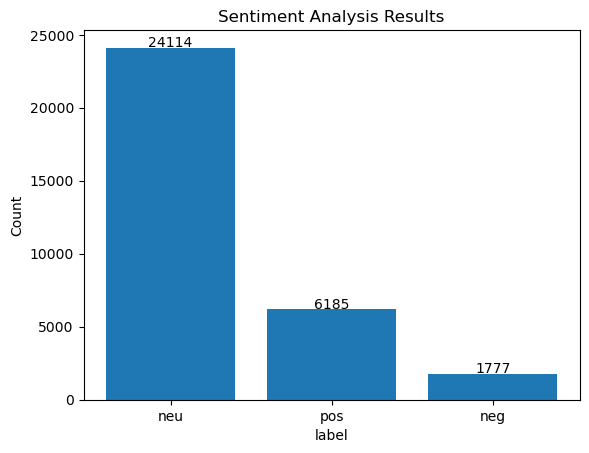

In [62]:
counts = df['label'].value_counts()
plt.bar(counts.index, counts.values)

for i, count in enumerate(counts.values):
    plt.text(i, count+50, str(count), ha='center')

plt.xlabel('label')
plt.ylabel('Count')
plt.title('Sentiment Analysis Results')

plt.show()

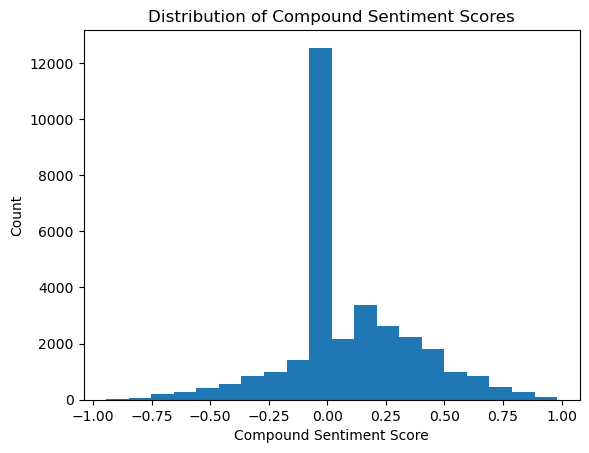

In [63]:
plt.hist(df['compound'], bins=20)
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Count')
plt.title('Distribution of Compound Sentiment Scores')
plt.show()

#### Top Positive Sentiments

In [64]:
sorted_pos_sent = df[df['label']=='pos'].sort_values(by='pos', ascending=False)
print(sorted_pos_sent['ReactionCounts'].describe())
sorted_pos_sent[['Text',
                 'ReactionCounts',
                 'pos',
                 'neg',
                 'neu',
                 'compound',
                 'label']].head()

count     6185.000000
mean        19.055457
std        387.479259
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max      18879.000000
Name: ReactionCounts, dtype: float64


,Text,ReactionCounts,pos,neg,neu,compound,label
23943,ChatGPT i love u,0,0.8080,0.0,0.1920,0.63690,pos
15858,i love chatgpt,0,0.8080,0.0,0.1920,0.63690,pos
14014,I love chatGPT.🤍,4,0.8080,0.0,0.1920,0.63690,pos
9992,@WatcherGuru Alright LFG ChatGPT I like it! lol 🔥,2,0.7725,0.0,0.2275,0.50315,pos
7714,ChatGPT's greatest asset: https://t.co/ccHO5tU7dH,2,0.7700,0.0,0.2300,0.77170,pos


#### Top Negative Sentiments

In [65]:
sorted_neg_sent = df[df['label']=='neg'].sort_values(by='neg', ascending=False)
print(sorted_neg_sent['ReactionCounts'].describe())
sorted_neg_sent[['Text',
                 'ReactionCounts',
                 'pos',
                 'neg',
                 'neu',
                 'compound',
                 'label']].head()

count    1777.000000
mean        6.646033
std        39.008419
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max       813.000000
Name: ReactionCounts, dtype: float64


,Text,ReactionCounts,pos,neg,neu,compound,label
30171,chatgpt IS HELLA SCARY WTF,0,0.0,0.777,0.223,-0.9094,neg
18909,scary\n#ChatGPT,1,0.0,0.762,0.238,-0.4939,neg
10824,Stop bullying #ChatGPT https://t.co/xuqhZrph3I,0,0.0,0.753,0.247,-0.7269,neg
11014,ChatGPT exposes World War III Scam https://t.co/g6VDPl3QVV,0,0.0,0.695,0.305,-0.8442,neg
27773,That ChatGPT shit is crazy,0,0.0,0.667,0.333,-0.7184,neg


#### Top Neutral Sentiments

In [66]:
sorted_neu_sent = df[df['label']=='neu'].sort_values(by='neu', ascending=False)
print(sorted_neu_sent['ReactionCounts'].describe())
sorted_neu_sent[['Text',
                 'ReactionCounts',
                 'pos',
                 'neg',
                 'neu',
                 'compound',
                 'label']].head()

count    24114.000000
mean        14.046861
std        481.400498
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max      66256.000000
Name: ReactionCounts, dtype: float64


,Text,ReactionCounts,pos,neg,neu,compound,label
1,Bow down to chatGPT 🫡..... https://t.co/ENTSzi2AQ9,2,0.0,0.0,1.0,0.0,neu
17767,"NVIDIA AI Eye Contact after ChatGPT, the era of AI has arrived",0,0.0,0.0,1.0,0.0,neu
17731,Microsoft infuses billions of dollars in ChatGPT developer OpenAI https://t.co/n9hJfUoyJy,0,0.0,0.0,1.0,0.0,neu
17732,@carolina_bonita If you were using Google in the past 10 years you have been loading it already. ChatGPT is a little baby compared to Google.,0,0.0,0.0,1.0,0.0,neu
17734,I asked ChatGPT 'Why is photography an art form?' \n\nHere's the answer: ⬇️,52,0.0,0.0,1.0,0.0,neu
